# Import libraries

In [6]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.6 MB 640.0 kB/s eta 0:00:16
     ---------------------------------------- 0.0/9.6 MB 435.7 kB/s eta 0:00:23
     ---------------------------------------- 0.0/9.6 MB 435.7 kB/s eta 0:00:23
     ---------------------------------------- 0.1/9.6 MB 262.6 kB/s eta 0:00:37
     ---------------------------------------- 0.1/9.6 MB 302.7 kB/s eta 0:00:32
     ---------------------------------------- 0.1/9.6 MB 374.1 kB/s eta 0:00:26
     ---------------------------------------- 0.1/9.6 MB 374.1 kB/s eta 0:00:26
      --------------------------------------- 0.2/9.6 MB 416.7 kB/s eta 0:00:23
      --------------------------------------- 0.2/9.6 MB 523.8 kB/s eta 0:00:19
      --------------------------------------- 0.2/9.6 MB 514.3 kB/s eta 0:00:19
     - -------------------------------------- 0.3/9.6 MB 545.8 kB/s eta 0:00:18
     - -------------------------------------- 0.3


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load dataset

In [11]:
df = pd.read_csv("C:/Users/98939/Downloads/MASTER_DATASET.csv")  
df = df.dropna()

# Define variables and weights

In [13]:
# Define target and predictors
X = df[['Pressure_In', 'Temperature_In', 'Flow_Rate', 'Efficiency']]
y = df['Power_Consumption']

# Add intercept to X for statsmodels
X = sm.add_constant(X)

# Compute weights (inverse of variance of each observation)

# Method 1 (empirical): Use standard deviation over rolling window (simulate sensor noise)
window = 10  # Or another window size
residual_std = y.rolling(window).std().bfill()

# Weight = 1 / Variance
weights = 1 / (residual_std ** 2)


# Fit Weighted Least Squares model

In [14]:
model_wls = sm.WLS(y, X, weights=weights)
results_wls = model_wls.fit()

# Print results

In [15]:
# Summary of WLS model
print(results_wls.summary())

                            WLS Regression Results                            
Dep. Variable:      Power_Consumption   R-squared:                       0.965
Model:                            WLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 6.943e+05
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:21:41   Log-Likelihood:            -5.5774e+05
No. Observations:               99961   AIC:                         1.115e+06
Df Residuals:                   99956   BIC:                         1.116e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9413.3107     12.976    725.

# Plot residuals vs fitted

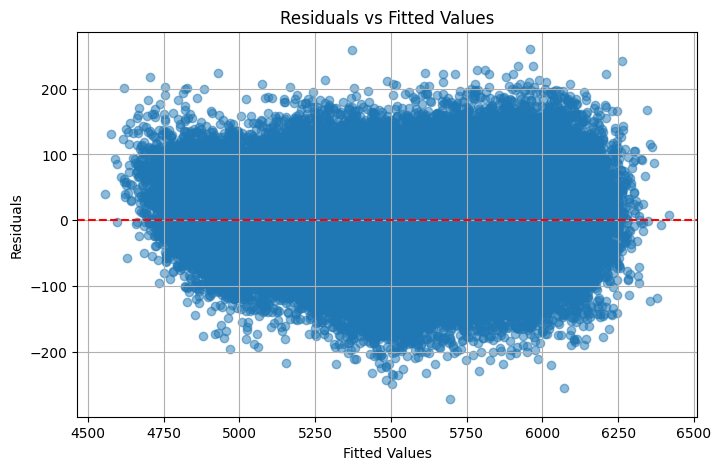

In [16]:
# 📊 Plot residuals
plt.figure(figsize=(8,5))
plt.scatter(results_wls.fittedvalues, results_wls.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()
